In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Методы оптимизации

Как было показано на лекции, большинство методов машинного обучения сводятся к поиску параметров, которые минимизируют ошибку на тренировочной выборке:
$$
\min_{w} L(f(x, w), y)
$$
Здесь:

* $L$ — функция потерь
* $w$ — настраиваемые веса алгоритма
* $y$ — вектор ответов
* $x$ — вектор значений
* $f$ — функция, принимающая вектор в качестве аргумента и выдающая числовое значение.



В более общем виде задачу можно записать так:
$$
\min_{x} f(x)
$$
Здесь:
* $x$ — вектор значений
* $f$ — функция, принимающая вектор в качестве аргумента и выдающая числовое значение.

На семинаре рассмотрим подробнее методы минимизации функции, которые рассматривались на лекции.

## Градиентный спуск

Для оптимизации возьмем простую функцию $f(x) = x^3 - 2x^2 + 2$

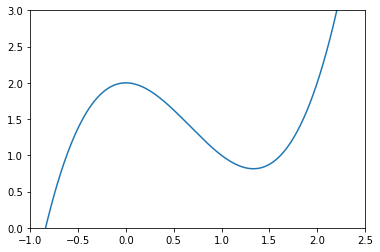

In [0]:
f = lambda x: x ** 3 - 2*x ** 2 + 2
df = lambda x: 3 * x ** 2 - 4 * x # производная
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0, 3])
plt.show()

И определим функцию, которая будет оптимизировать функцию $f(x)$ градиентным спуском с заданным постоянным шагом (он же learning rate, темп обучения).

In [0]:
def optimize_and_plot_steps(learning_rate, x_new=2, compute_learning_rate=None):
    x_old = 0
    # x_new — точка старта
    eps = 0.0001
    x_list, y_list = [x_new], [f(x_new)] # инициализируем список координат и значений функций при итерации
    
    # спускаемся, пока разница между координатами не достигла требуемой точности
    i = 0
    while abs(x_new - x_old) > eps:
        # обновляем значение темпа обучения, если нам задана функция для этого
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(i, learning_rate)
            
        x_old = x_new
        # считаем направление спуска
        # делаем шаг
        # Ваш код здесь!
        x_new = x_old - learning_rate * df(x_old)
        # запоминаем очередной шаг минимизации
        x_list.append(x_new)
        y_list.append(f(x_new))
        i += 1
        
    print("Найденный локальный минимум:", x_new)
    print("Количество шагов:", len(x_list))
    
    plt.figure(figsize=[10,3])
    
    plt.subplot(1,2,1)
    plt.scatter(x_list, y_list, c="r", edgecolors='k')
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, f(x), c="b")
    plt.xlim([-1,2.5])
    plt.ylim([0,3])
    plt.title("Descent trajectory")

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="r", edgecolors='k')
    plt.plot(x_list,y_list,c="r")
    plt.plot(x,f(x), c="b")
    plt.xlim([1.2,2.1])
    plt.ylim([0,3])
    plt.title("Descent trajectory (zoomed in)")
    plt.show()

Попробуем оптимизацию с шагом 0.1

Найденный локальный минимум: 1.3334253508453249
Количество шагов: 17


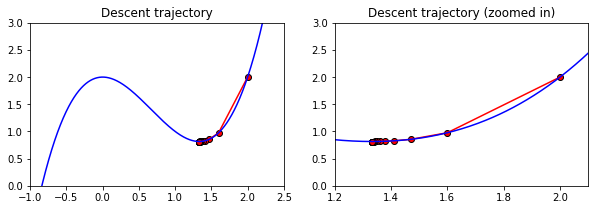

In [0]:
optimize_and_plot_steps(0.1)

Возьмем шаг побольше.

Найденный локальный минимум: 1.3333020223878838
Количество шагов: 15


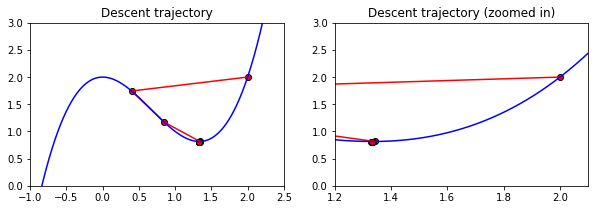

In [0]:
optimize_and_plot_steps(0.4)

Что, если взять 0.5?

Найденный локальный минимум: 0.0
Количество шагов: 3


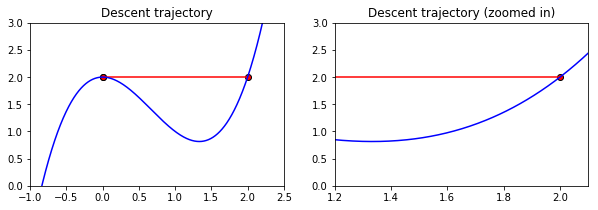

In [0]:
optimize_and_plot_steps(0.5)

Застопорились в нуле, т.к. нашли точный локальный максимум. В нем производная равна нулю и мы никуда не можем сдвинуться. А если взять 0.49?

Найденный локальный минимум: 1.3333812706364907
Количество шагов: 188


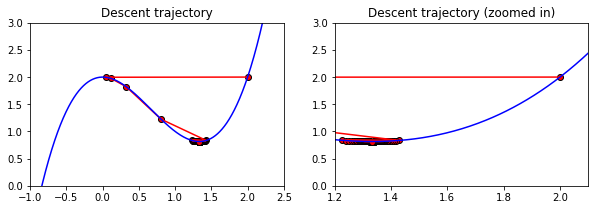

In [0]:
optimize_and_plot_steps(0.49)

Что, если взять 0.51?

In [0]:
optimize_and_plot_steps(0.51)

OverflowError: ignored

Мы улетели далеко влево. Это можно понять, распечатав значения x_new.

Теперь возьмём маленький шаг. Например, 0.05.

Найденный локальный минимум: 1.3337297312792562
Количество шагов: 32


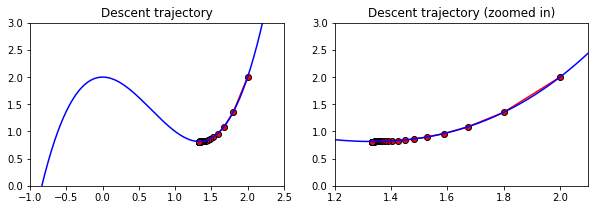

In [0]:
optimize_and_plot_steps(0.05)

0.01?

Найденный локальный минимум: 1.3356881625009205
Количество шагов: 129


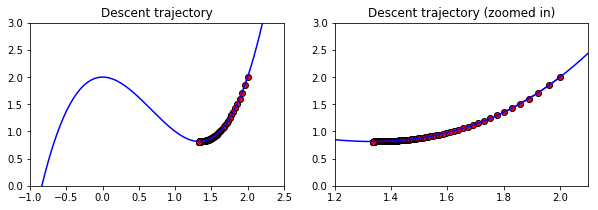

In [0]:
optimize_and_plot_steps(0.01)

Чем меньше шаг, тем медленнее мы идём к минимум (и можем вдобавок застрять по пути). Чем больше темп обучения, тем большие расстояния мы перепрыгиваем (и имеем гипотетическую возможность найти минимум получше). Хорошая стратегия — начинать с достаточно большого шага (чтобы хорошо попутешествовать по функции), а потом постепенно его уменьшать, чтобы стабилизировать процесс обучения в каком-то локальном минимуме.

Теперь будем изменять шаг динамически:
$lr(i + 1) = lr(i) * 0.9$.

In [0]:
def compute_learning_rate(i, prev_lr):
    return prev_lr * 0.9

Найденный локальный минимум: 1.3333376009455882
Количество шагов: 7


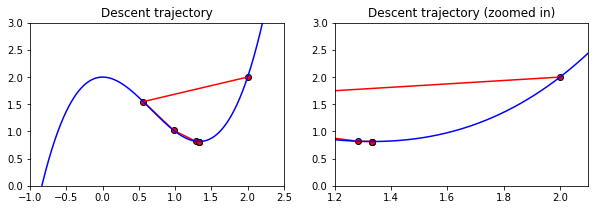

In [0]:
optimize_and_plot_steps(0.4, compute_learning_rate=compute_learning_rate)

Если сравнивать с постоянным темпом обучения, то мы нашли минимум в 2 раза быстрее.

Найденный локальный минимум: 1.3333020223878838
Количество шагов: 15


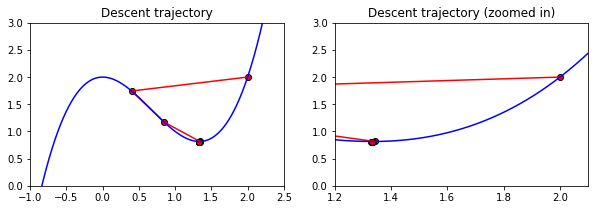

In [0]:
optimize_and_plot_steps(0.4)

Это, конечно, искуственный пример, но такая же идея используются для обучения алгоритмов машинного обучения с миллионами параметров, функции потерь которых имеют очень сложную структуру и не поддаются визуализации.

## Настройка линейной регрессии с помощью градиентного спуска

Рассмотрим теперь реальные данные и попробуем использовать градиентный спуск для решения задачи линейной регрессии.

Загрузите файл food_trucks.txt. В нём два столбца значений — количество жителей в городе и доход грузовика с уличной едой в этом городе.

In [0]:
import pandas as pd

df = pd.read_csv("./food_trucks.txt", header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Визуализируйте данные. По оси X — население города, по оси Y — доход грузовика.

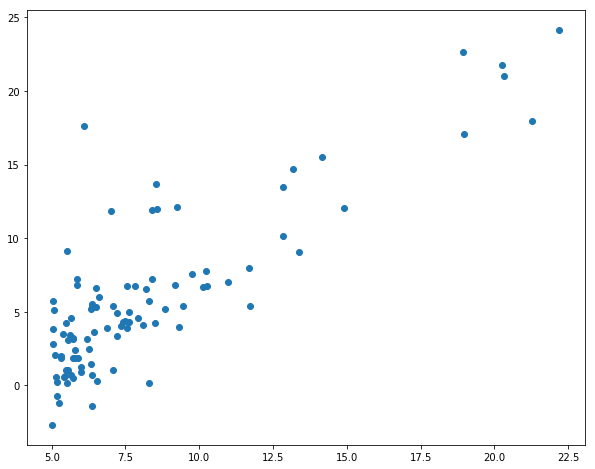

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df[0], df[1])
plt.show()

Вспомним функцию потерь линейной регрессии:
$$
L(w) = \frac{1}{2m} \sum_{i=1}^m (h(x^i, w) - y^i)^2
$$
Здесь $h(x, w) = w^Tx = w_0 + w_1 x_1$ (предполагается, что $x_0=1$ — дополнительный признак для удобства).
$(x^i, y^i)$ — i-ый объект выборки.
Тогда правило обновления весов будет выглядеть следующим образом:
$$
w_j = w_j - \eta \cdot \frac{1}{m}\sum_{i=1}^m(h(x^i, w) - y^i) x^i_j.
$$
Здесь $x^i_j$ — j-ая компонента i-ого объекта.

Определите функцию потерь и её производную. Эти функции имеют один аргумент — вектор весов $w$.

In [0]:
L = lambda w: np.mean((X @ w - y)**2) / 2.
dL = lambda w: np.mean((X @ w - y)[..., None] * X, axis=0)

In [0]:
import numpy as np
X = np.stack((np.ones(len(df)), df[0]), axis=1)
y = df[1].values
w = np.ones(2)

array([ 3.32066495, 24.23489308])

Напишите функцию минимизации $L(w)$ с помощью градиентного спуска, аналогичную optimize_and_plot_steps. На вход она принимает параметры обучения (темп обучения и начальное значение весов), оптимизирует итеративно функцию потерь, печатает итерации и визуализирует уменьшение функции потерь и найденное решение. Запустите функцию с постоянным темпом обучения и прокомментируйте результаты.

In [0]:
def optimize_and_plot_steps(learning_rate, x_new=np.ones(2), compute_learning_rate=None):
    x_old = np.zeros(2)
    # x_new — точка старта
    eps = 0.0001
    x_list, y_list = [x_new], [L(x_new)] # инициализируем список координат и значений функций при итерации
    
    # спускаемся, пока разница между координатами не достигла требуемой точности
    i = 0
    while np.mean(abs(x_new - x_old)) > eps:
        # обновляем значение темпа обучения, если нам задана функция для этого
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(i, learning_rate)
            
        x_old = x_new
        # считаем направление спуска
        # делаем шаг
        x_new = x_old - learning_rate * dL(x_old)# Ваш код здесь!
        
        # запоминаем очередной шаг минимизации
        x_list.append(x_new)
        y_list.append(L(x_new))
        i += 1
    return x_new

In [0]:
optimize_and_plot_steps(0.01, compute_learning_rate=None)

array([-3.7952   ,  1.1829292])

Измените функцию минимизации так, чтобы темп обучения мог меняться динамически, аналогично примеру выше. Запустите функцию и прокомментируйте результаты.

## Стохастический градиентный спуск (SGD)

При стандартном («batch») градиентном спуске для корректировки параметров модели используется градиент. Градиент обычно считается как сумма градиентов, вызванных каждым элементом обучения. Вектор параметров изменяется в направлении антиградиента с заданным шагом. Поэтому стандартному градиентному спуску требуется один проход по обучающим данным до того, как он сможет менять параметры.

При стохастическом градиентном спуске значение градиента аппроксимируются градиентом функции стоимости, вычисленном только на одном элементе обучения. Затем параметры изменяются пропорционально приближенному градиенту. Таким образом параметры модели изменяются после каждого объекта обучения. Для больших массивов данных стохастический градиентный спуск может дать значительное преимущество в скорости по сравнению со стандартным градиентным спуском.

Между этими двумя видами градиентного спуска существует компромисс, называемый иногда «mini-batch». В этом случае градиент аппроксимируется суммой для небольшого количества обучающих образцов.

\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x^{(i)};w), y^{(i)}) \\
w &=& w - \eta \times g
\end{eqnarray}

**Метод накопления импульса (Momentum)** 

Использует экспоненциальное скользящее среднее чтобы накапливать градиент целевой функции. Чем ближе $\alpha$ к единице, тем больше окно накопления и сильнее сглаживание — накопленные градиенты начинают влиять сильнее, чем каждый очередной градиент.

\begin{eqnarray}
v &=& \alpha v - (1 - \alpha) \nabla_w \big(\frac{1}{m}\sum_i 
L(f(x^{(i)};w), y^{(i)}) \big) \\
w &=& w + v
\end{eqnarray}

**AdaGrad**  

Эффективно перемасштабирует шаг обучения
для каждого параметра в отдельности, учитывая историю всех прошлых градиентов для
этого параметра. Это делается путем деления каждого элемента в
градиенте $g$ на квадратный корень суммы квадратов прошлых соответствующих элементов
градиента. Перемасштабирование таким способом эффективно уменьшает шаг обучения для
параметров, которые имеют большую величину градиента. Также метод уменьшает сам шаг
обучения со временем, так как сумма квадратов увеличивается с каждой итерацией. 

\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x^{(i)};w), y^{(i)}) \\
s &=& s + g^{T}g \\
w &=& w - \eta \times \frac{g} {\sqrt{s+eps}}
\end{eqnarray}

**RMSProp**

Очень похож по принципу работы на метод Adagrad. Единственное его отличие в том, что шкалирующий член
$s$ вычисляется, как экспоненциальное скользящее среднее вместо кумулятивной суммы, это позволяет сгладить выбросы.

\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x^{(i)};w), y^{(i)}) \\
s &=& \mathrm{decay\_rate}\times s + (1-\mathrm{decay\_rate}) g^{T}g \\
w &=& w - \eta \times \frac{g}{\sqrt{s+eps}}
\end{eqnarray}

**Adam**

Можно рассматривать как комбинацию RMSProp и Метода накопления импульса. Обновление весов выглядит как в RMSProp за исключением того что вместо обычного градиента используется градиент сглаженный экспоненциальным скользящим средним и убывающего шага.

Рекомендованные значения $\epsilon = 1e-8$, $\beta_1 = 0.9$, $\beta_2 = 0.999$

\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x^{(i)};w), y^{(i)}) \\
m &=& \beta_1 m + (1-\beta_1) g\\
s &=& \beta_2 v + (1-\beta_2) g^{T}g \\
w &=& w - \eta \times \sqrt{\frac{ 1 -  \beta_2}{ 1 - \beta_1}} \times \frac{ m }{ \sqrt{s+eps}}
\end{eqnarray}

Рассмотрим популярные методы оптимизации, используемые для обучения нейронных сетей, на примере сверточной нейронной сети, обученной на датасете MNIST, с помощью Tensorflow.




In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import variance_scaling_initializer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [0]:
def weight_variable(name, shape):
    he_normal = variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False,
                                             seed=None, dtype=tf.float32) 
    return tf.get_variable(name, shape=shape, initializer=he_normal)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')



In [0]:
#dataset
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

#parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 50
display_step = 100

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x, [-1,28,28,1])

#layer 1
W_conv1 = weight_variable("W1", [5,5,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#layer 2
W_conv2 = weight_variable("W2", [5,5,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#layer 3
W_fc1 = weight_variable("W3", [7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#layer 5
W_fc2 = weight_variable("W5", [1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



сравним некоторые из описанных выше методы

In [0]:
#optimizers
train_step1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
train_step2 = tf.train.MomentumOptimizer(learning_rate, momentum=0.9, use_nesterov=True).minimize(cross_entropy)
train_step3 = tf.train.RMSPropOptimizer(learning_rate).minimize(cross_entropy)
train_step4 = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess1:
    sess1.run(init)

    print("training with SGD optimizer...")
    avg_loss_sgd = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, loss = sess1.run([train_step1, cross_entropy], 
                            feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
        avg_loss_sgd[epoch] = loss

        if epoch % display_step == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_:batch_ys, keep_prob: 1.0})
            print("Epoch %04d, training accuracy %.2f"%(epoch, train_accuracy))
    #end for
    print("test accuracy %g" %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

training with SGD optimizer...
Epoch 0000, training accuracy 0.10
Epoch 0100, training accuracy 0.78
Epoch 0200, training accuracy 0.76
Epoch 0300, training accuracy 0.84
Epoch 0400, training accuracy 0.98
test accuracy 0.8902


In [0]:
with tf.Session() as sess2:
    sess2.run(init)

    print("training with momentum optimizer...")
    avg_loss_momentum = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, loss = sess2.run([train_step2, cross_entropy], 
                            feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
        avg_loss_momentum[epoch] = loss

        if epoch % display_step == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_:batch_ys, keep_prob: 1.0})
            print("Epoch %04d, training accuracy %.2f"%(epoch, train_accuracy))
    #end for
    print("test accuracy %g" %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

training with momentum optimizer...
Epoch 0000, training accuracy 0.14
Epoch 0100, training accuracy 0.90
Epoch 0200, training accuracy 0.92
Epoch 0300, training accuracy 0.94
Epoch 0400, training accuracy 0.98
test accuracy 0.9498


In [0]:
with tf.Session() as sess3:
    sess3.run(init)

    print("training with RMSProp optimizer...")
    avg_loss_rmsprop = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, loss = sess3.run([train_step3, cross_entropy], 
                            feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
        avg_loss_rmsprop[epoch] = loss

        if epoch % display_step == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_:batch_ys, keep_prob: 1.0})
            print("Epoch %04d, training accuracy %.2f"%(epoch, train_accuracy))
    #end for
    print("test accuracy %g" %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))



training with RMSProp optimizer...
Epoch 0000, training accuracy 0.08
Epoch 0100, training accuracy 0.94
Epoch 0200, training accuracy 1.00
Epoch 0300, training accuracy 1.00
Epoch 0400, training accuracy 1.00
test accuracy 0.9807


In [0]:
with tf.Session() as sess4:
    sess4.run(init)

    print("training with Adam optimizer...")
    avg_loss_adam = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, loss = sess4.run([train_step4, cross_entropy], 
                            feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
        avg_loss_adam[epoch] = loss

        if epoch % display_step == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_:batch_ys, keep_prob: 1.0})
            print("Epoch %04d, training accuracy %.2f"%(epoch, train_accuracy))
    #end for
    print("test accuracy %g" %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

training with Adam optimizer...
Epoch 0000, training accuracy 0.22
Epoch 0100, training accuracy 0.98
Epoch 0200, training accuracy 0.96
Epoch 0300, training accuracy 1.00
Epoch 0400, training accuracy 0.98
test accuracy 0.978


**Упражнение**. Нарисуйте графики убывания лосса. Сделайте выводы по результатам экспериментов. Какие методы показали себя лучше?


In [0]:
# нарисовать графики сходимости
# ВАШ КОД ЗДЕСЬ

